# import

In [15]:
import pandas as pd
import numpy as np
import pixiedust
import math
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# load & process data

In [43]:
primes_100k = pd.read_csv("prime/primes-to-100k.txt", names=['prime'], dtype=int)

In [44]:
primes_100k.head()
primes_100k.describe()
primes_100k.size

9592

In [16]:
# %%pixie_debugger
def isPrime(n):
    if n <= 1:  
        return 0 
    for i in range(2, int(math.sqrt(n)) + 1):  
        if n % i == 0:  
            return 0 
    return 1 

def get_num_vector(num, vector_len):
    vec = [0] * vector_len
    j = vector_len - 1
    while num > 0:
        reminder = num % 10
        num = math.floor(num / 10)
        vec[j] = reminder
        j = j - 1
    return vec

def createXy(n, features_num):
    ls = list(range(2, n))
    np.random.shuffle(ls)
    sample_X = []
    sample_y = []
    for v in ls:
        y = isPrime(v)
        x = get_num_vector(v, features_num)
        sample_X.append(x)
        sample_y.append(y)
#         print(x)
    return sample_X, sample_y

features_num = 10
X, y = createXy(10000, features_num)
X, y = np.array(X), np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

        
        

# define model

In [17]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, input_shape=(features_num, ), activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                704       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


# train model

In [18]:
history = model.fit(X_train, y_train, epochs=100, validation_split = 0.2, batch_size=1, verbose=1)

Train on 5358 samples, validate on 1340 samples
Epoch 1/100
5358/5358 [==============================] - 9s 2ms/sample - loss: 0.4040 - acc: 0.8703 - val_loss: 0.3909 - val_acc: 0.8799
Epoch 2/100
5358/5358 [==============================] - 7s 1ms/sample - loss: 0.3901 - acc: 0.8725 - val_loss: 0.3753 - val_acc: 0.8799
Epoch 3/100
5358/5358 [==============================] - 8s 2ms/sample - loss: 0.3808 - acc: 0.8723 - val_loss: 0.3691 - val_acc: 0.8799
Epoch 4/100
5358/5358 [==============================] - 9s 2ms/sample - loss: 0.3735 - acc: 0.8725 - val_loss: 0.3500 - val_acc: 0.87994 - - ETA: 5s - loss: 0.3 - ETA: 4s - -  - ETA: 1s - los - ETA: 0s - loss: 0.3721 - acc: 0. - ETA: 0s - loss: 0.3740 - acc:  - ETA: 0s - loss: 0.3731 - acc: 0.873 - ETA: 0s - loss: 0.3724 - ac
Epoch 5/100
5358/5358 [==============================] - 10s 2ms/sample - loss: 0.3666 - acc: 0.8725 - val_loss: 0.3601 - val_acc: 0.87992s - loss: 0.3676 - acc: 0.8 - ETA: 2s - loss: 0. - ETA: 1s  - ETA: 0s - lo

5358/5358 [==============================] - 8s 2ms/sample - loss: 0.3401 - acc: 0.8731 - val_loss: 0.3290 - val_acc: 0.8791
Epoch 52/100
5358/5358 [==============================] - 11s 2ms/sample - loss: 0.3412 - acc: 0.8723 - val_loss: 0.3283 - val_acc: 0.8799
Epoch 53/100
5358/5358 [==============================] - 10s 2ms/sample - loss: 0.3417 - acc: 0.8729 - val_loss: 0.3257 - val_acc: 0.8799
Epoch 54/100
5358/5358 [==============================] - 8s 1ms/sample - loss: 0.3412 - acc: 0.8718 - val_loss: 0.3305 - val_acc: 0.8799
Epoch 55/100
5358/5358 [==============================] - 8s 2ms/sample - loss: 0.3400 - acc: 0.8731 - val_loss: 0.3323 - val_acc: 0.8761TA: 3s 
Epoch 56/100
5358/5358 [==============================] - 7s 1ms/sample - loss: 0.3404 - acc: 0.8716 - val_loss: 0.3269 - val_acc: 0.8791
Epoch 57/100
5358/5358 [==============================] - 10s 2ms/sample - loss: 0.3393 - acc: 0.8710 - val_loss: 0.3349 - val_acc: 0.8716
Epoch 58/100
5358/5358 [=============

In [19]:

history_history = history.history
print("keys=", history_history.keys())

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

keys= dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


,loss,acc,val_loss,val_acc,epoch
95,0.333562,0.871781,0.320858,0.876866,95
96,0.332662,0.871594,0.319184,0.879104,96
97,0.333131,0.871221,0.318469,0.879104,97
98,0.332616,0.871967,0.317032,0.879851,98
99,0.332041,0.871034,0.318189,0.877612,99


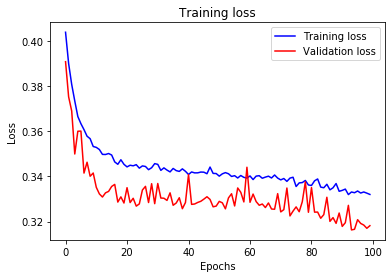

In [20]:
def print_history(history):
    loss = history.history['loss']
    epochs = history.epoch
    val_loss = history.history['val_loss']

#     epochs = range(1, len(mean_absolute_error) + 1)

    # "bo" is for "blue dot"
    plt.figure()
    plt.plot(epochs, loss, 'b', label='Training loss')

    # b is for "solid blue line"
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
#     plt.figure()
#     plt.plot(epochs, mean_absolute_error, 'r', label="Metrics mae")
#     plt.plot(epochs, val_mean_absolute_error, 'b', label="Metrics mae val ")
#     plt.title('Metrics MAE')
#     plt.xlabel('Epochs')
#     plt.ylabel('Metrics')
#     
#     plt.legend()
    plt.show()
    
print_history(history)

# predict

In [21]:
results = model.evaluate(X_test, y_test)

3300/3300 [==============================] - 0s 27us/sample - loss: 0.3203 - acc: 0.8827


In [28]:
predictions = model.predict(X_test).flatten()
print(len(predictions))
count = 0;
for y_predict, y_label, x in zip(predictions, y_test, X_test):
    print(y_predict, y_label, x)
    count = count + 1
    if (count > 100):
        break

3300
0.093629956 0 [0 0 0 0 0 0 2 8 2 4]
0.06757185 0 [0 0 0 0 0 0 5 5 4 2]
0.04926762 0 [0 0 0 0 0 0 7 0 4 5]
0.031435728 0 [0 0 0 0 0 0 9 2 8 2]
0.0 0 [0 0 0 0 0 0 0 9 4 0]
0.078267455 0 [0 0 0 0 0 0 3 8 0 4]
0.38340423 0 [0 0 0 0 0 0 0 5 9 1]
0.046100825 0 [0 0 0 0 0 0 5 0 4 5]
0.5088711 0 [0 0 0 0 0 0 9 0 3 9]
0.20793629 0 [0 0 0 0 0 0 0 2 6 8]
0.096958995 0 [0 0 0 0 0 0 1 6 6 4]
0.24155873 0 [0 0 0 0 0 0 8 5 6 9]
0.07573813 0 [0 0 0 0 0 0 3 1 5 4]
0.0 0 [0 0 0 0 0 0 9 0 8 0]
0.17246956 0 [0 0 0 0 0 0 2 4 0 8]
0.12844887 0 [0 0 0 0 0 0 0 8 4 7]
0.07202685 0 [0 0 0 0 0 0 4 3 7 6]
0.07226956 0 [0 0 0 0 0 0 6 4 6 6]
0.12981236 1 [0 0 0 0 0 0 6 3 1 7]
0.070794284 0 [0 0 0 0 0 0 5 5 2 2]
0.11790481 1 [0 0 0 0 0 0 5 5 5 7]
0.06834379 0 [0 0 0 0 0 0 8 5 6 5]
0.121990055 0 [0 0 0 0 0 0 4 3 2 3]
0.05746144 0 [0 0 0 0 0 0 3 8 7 2]
0.09225497 0 [0 0 0 0 0 0 9 8 0 7]
0.3801448 1 [0 0 0 0 0 0 2 0 9 9]
0.08422181 0 [0 0 0 0 0 0 1 5 6 6]
0.06789893 0 [0 0 0 0 0 0 4 3 8 6]
0.19920322 0 [0 0 0 0 0 